In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import joblib

## 📥 Load Sign Language MNIST Data

We load the training and testing data from CSV files, then separate the features and labels.

```python
import pandas as pd

# Load the datasets
df_train = pd.read_csv(r"C:\Users\Public\Downloads\sign_mnist_train.csv\sign_mnist_train.csv")
df_test = pd.read_csv(r"C:\Users\Public\Downloads\sign_mnist_test.csv\sign_mnist_test.csv")

# Split into features and labels
x_train = df_train.drop("label", axis=1)
y_train = df_train["label"]
x_test = df_test.drop("label", axis=1)
y_test = df_test["label"]


In [7]:
df_train=pd.read_csv(r"C:\Users\Public\Downloads\sign_mnist_train.csv\sign_mnist_train.csv")
df_test=pd.read_csv(r"C:\Users\Public\Downloads\sign_mnist_test.csv\sign_mnist_test.csv")

In [8]:
x_train=df_train.drop("label",axis=1)
y_train=df_train["label"]
x_test=df_test.drop("label",axis=1)
y_test=df_test["label"]

## 🎨 Normalize Pixel Values to [0, 1]

Pixel values in the Sign Language MNIST dataset range from 0 to 255. To simplify and stabilize the learning process, we normalize the data by dividing by 255.0.

```python
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

## 🧠 Train Basic SVM Model (No Grid Search)

We train a basic `SVC` model using the default parameters on the normalized dataset.

```python
from sklearn.svm import SVC

# Initialize and train SVM
model = SVC()
model.fit(x_train, y_train)


In [5]:
model=SVC()
model.fit(x_train, y_train)

In [7]:
y_pred=model.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred)) # with out hyper parameter tunning

Accuracy: 0.8418851087562744


## 📊 Visualize Cumulative Explained Variance using PCA

Before applying PCA, it's helpful to visualize how much variance each principal component explains. This helps decide the number of components to retain.

```python
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on the training data (only to analyze variance)
pca = PCA().fit(x_train)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.title('Explained Variance vs Number of Components')
plt.show()


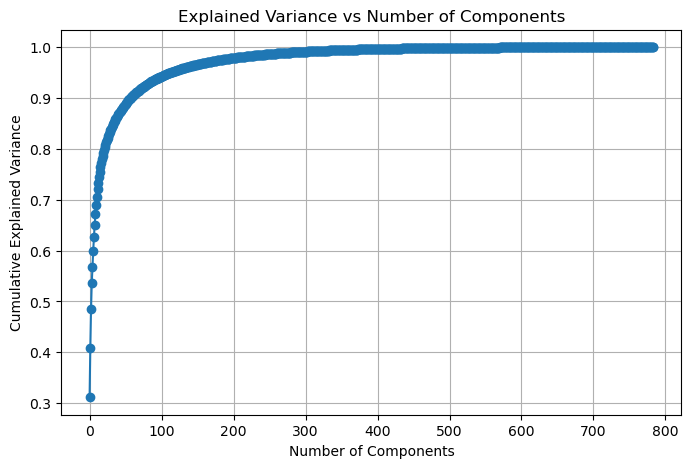

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(x_train)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot it
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.title('Explained Variance vs Number of Components')
plt.show()


In [ ]:
# pca=PCA(n_components=200)
# x_train=pca.fit_transform(x_train)
# x_test=pca.transform(x_test)

## 🧬 Apply PCA with 100 Components

We apply PCA to reduce the dimensionality of the data from 784 to 100 components. This speeds up training and may improve generalization.

```python
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=100)
x_trainpca = pca.fit_transform(x_train)
x_testpca = pca.transform(x_test)


In [10]:
pca=PCA(n_components=100)
x_trainpca=pca.fit_transform(x_train)
x_testpca=pca.transform(x_test)


---

### 🚀 Train SVM on PCA-Reduced Data


We train the same `SVC` model using the PCA-transformed training data.

```python
from sklearn.svm import SVC

# Train model on PCA data
model = SVC()
model.fit(x_trainpca, y_train)


## 📈 Final Evaluation of SVM Model (Without Grid Search, After PCA)

We evaluate the basic `SVC` model trained on PCA-reduced data **without** hyperparameter tuning using `GridSearchCV`.

```python
from sklearn.metrics import accuracy_score, classification_report

# Predict on PCA-transformed test set
y_pred = model.predict(x_testpca)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [24]:
model=SVC()
model.fit(x_trainpca, y_train) 

SVC()

In [25]:
y_pred=model.predict(x_testpca)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8573619631901841


In [30]:
 
print(classification_report(y_test, y_pred))

 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      0.99       432
           2       0.86      0.99      0.92       310
           3       0.94      1.00      0.97       245
           4       0.95      1.00      0.97       498
           5       0.76      0.85      0.80       247
           6       0.94      0.91      0.92       348
           7       0.97      0.95      0.96       436
           8       0.81      0.91      0.86       288
          10       0.81      0.68      0.74       331
          11       0.89      0.99      0.94       209
          12       0.86      0.75      0.80       394
          13       0.90      0.69      0.78       291
          14       0.99      0.85      0.91       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       0.33      0.62      0.44       144
          18       0.72    

In [32]:
 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.99      0.99       432
           2       0.86      0.99      0.92       310
           3       0.94      1.00      0.97       245
           4       0.95      1.00      0.97       498
           5       0.76      0.85      0.80       247
           6       0.94      0.91      0.92       348
           7       0.97      0.95      0.96       436
           8       0.81      0.91      0.86       288
          10       0.81      0.68      0.74       331
          11       0.89      0.99      0.94       209
          12       0.86      0.75      0.80       394
          13       0.90      0.69      0.78       291
          14       0.99      0.85      0.91       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       0.33      0.62      0.44       144
          18       0.72    

### 📌 Confusion Matrix Visualization


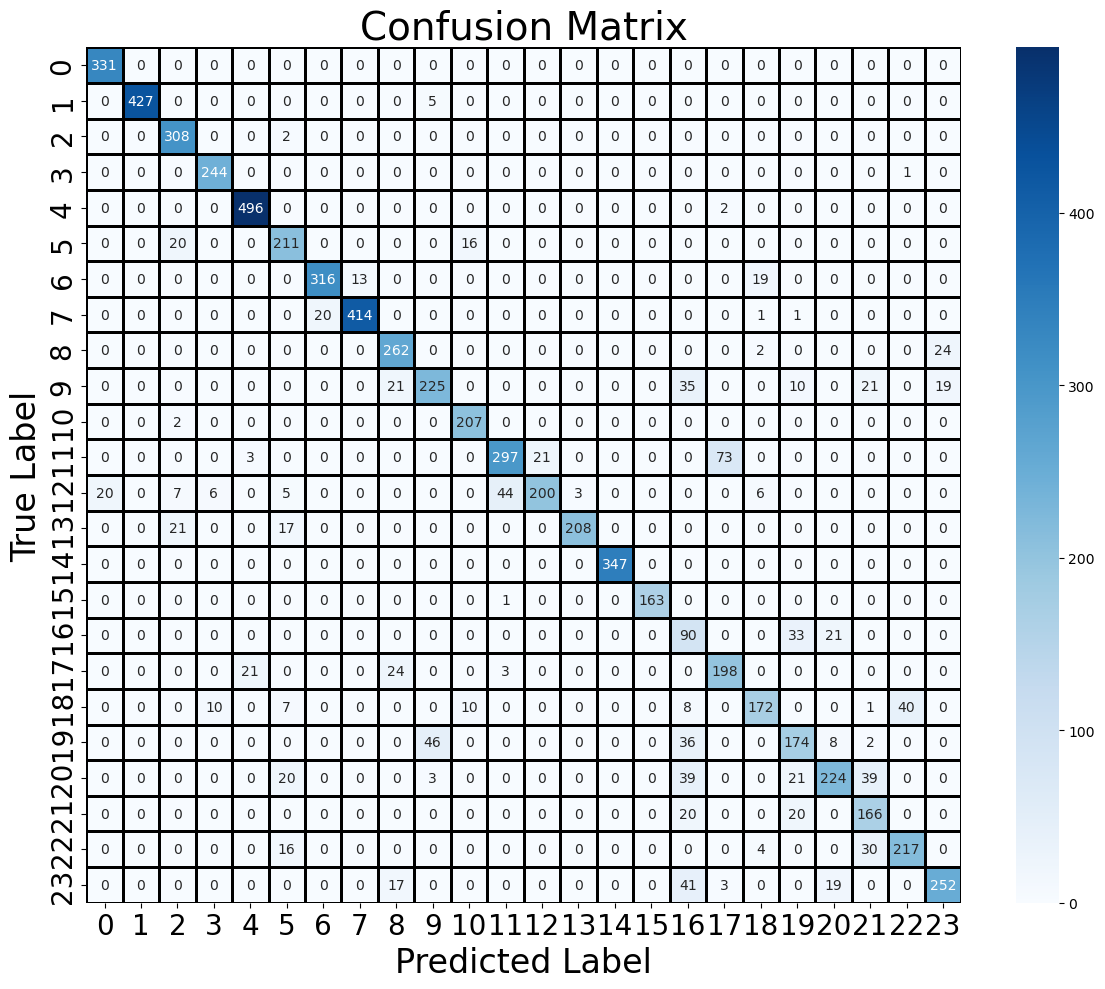

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10)) 

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            
            linewidths=2, linecolor='black',
            annot_kws={"size": 10})  # Make numbers bigger

plt.title('Confusion Matrix', fontsize=28)
plt.xlabel('Predicted Label', fontsize=24)
plt.ylabel('True Label', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


## 🧪 Hyperparameter Tuning with GridSearchCV (on PCA Data)

We perform a grid search over multiple values of `C` and `gamma` for both `'rbf'` and `'linear'` kernels using the PCA-transformed training data.

```python
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid for both 'rbf' and 'linear' kernels
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    },
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
    }
]

# Initialize GridSearchCV
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit grid search on PCA-transformed training data
grid.fit(x_trainpca, y_train)


In [4]:
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    },
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
        
    }
]


In [5]:
model=SVC()

In [6]:
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [11]:
grid.fit(x_trainpca, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}],
             verbose=2)

## ✅ Evaluate Best SVM Model on Test Set (After Grid Search)

After completing the grid search, we evaluate the best-found SVM model on the PCA-transformed test set.

```python
from sklearn.metrics import classification_report, accuracy_score

# Predict using the best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(x_testpca)

# Evaluation
print("Best Parameters Found:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [12]:
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 1.0


In [37]:
y_pred = grid.best_estimator_.predict(x_testpca)

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8581985499163414


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       331
           1       1.00      1.00      1.00       432
           2       0.85      0.99      0.92       310
           3       0.97      1.00      0.98       245
           4       0.96      1.00      0.98       498
           5       0.71      0.83      0.76       247
           6       0.94      0.93      0.93       348
           7       0.99      0.94      0.96       436
           8       0.82      0.86      0.84       288
          10       0.81      0.67      0.73       331
          11       0.90      0.95      0.92       209
          12       0.85      0.75      0.80       394
          13       0.90      0.68      0.78       291
          14       0.99      0.85      0.91       246
          15       1.00      1.00      1.00       347
          16       0.99      1.00      1.00       164
          17       0.36      0.59      0.45       144
          18       0.75    


---

### 📌  Confusion Matrix Visualization
 


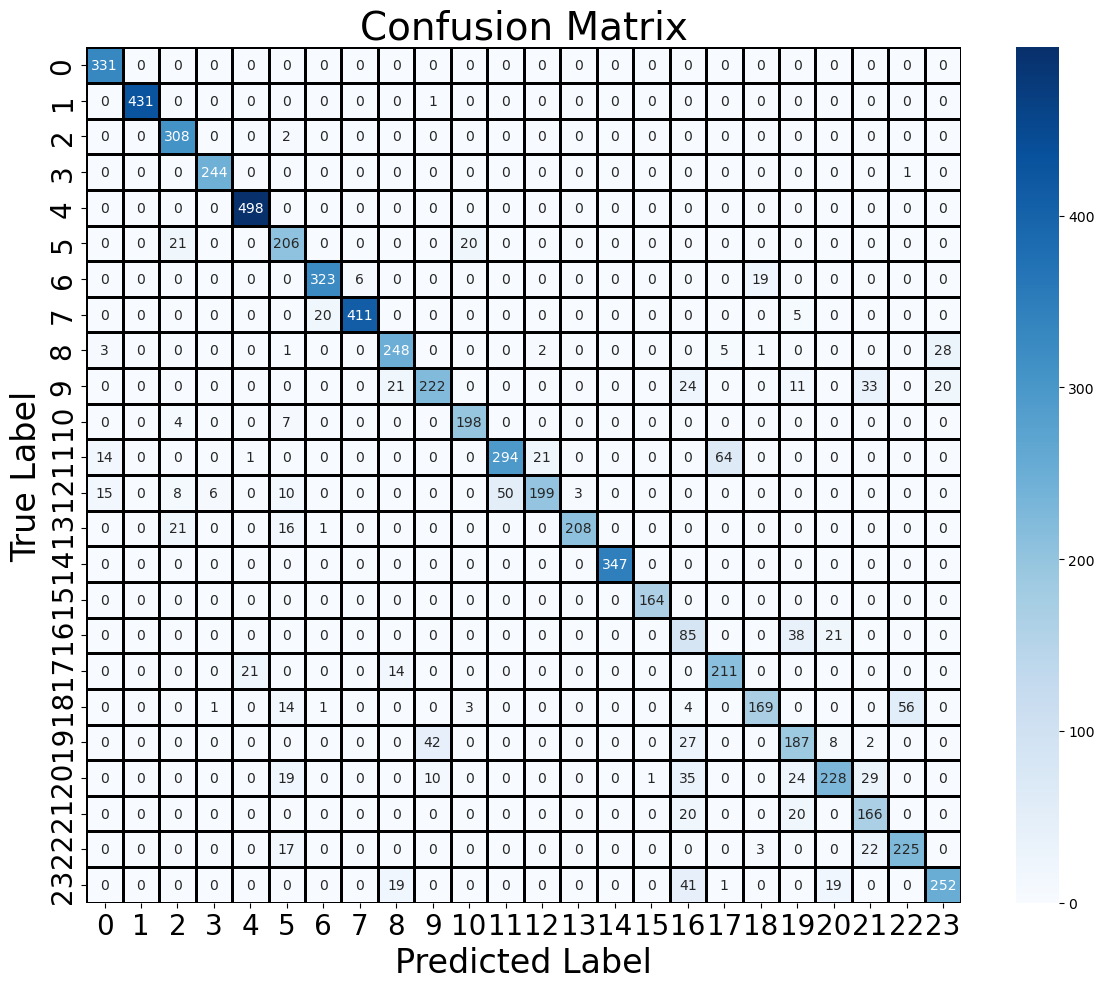

In [40]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10)) 

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            
            linewidths=2, linecolor='black',
            annot_kws={"size": 10})  # Make numbers bigger

plt.title('Confusion Matrix', fontsize=28)
plt.xlabel('Predicted Label', fontsize=24)
plt.ylabel('True Label', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [12]:
joblib.dump(grid.best_estimator_,"sign_svmmodel.pkl")
joblib.dump(pca,"PCA.pkl")

['PCA.pkl']